<img src="https://raw.githubusercontent.com/paular143/images_notebooks/master/logo-sin-nombre.png" alt="Universidad de Los Andes" style="width: 90px;" align="left" frameborder="300"/>

**UNIVERSIDAD DE LOS ANDES** <br>
**FACULTAD DE ECONOMÍA** <br>
**TÓPICOS EN APRENDIZAJE DE MÁQUINAS** <br>

## COMPAS - Aequitas

COMPAS (Correctional Offender Management Profiling for Alternative Sanctions) es un sistema algorítmico usado en el sistema judicial de EE. UU. para predecir la probabilidad de reincidencia de personas acusadas o condenadas. Ha sido ampliamente analizado porque parece funcionar de forma injusta contra ciertos grupos demográficos (por ejemplo, por raza).

Aequitas es una herramienta de código abierto en Python para: Auditar bias (sesgo) en predicciones de modelos de ML, Calcular distintas métricas de fairness, Comparar grupos protegidos (por ejemplo, raza, género), Visualizar y reportar disparidades de forma automatizada.

In [2]:
# ===============================
# 1. IMPORTACIONES
# ===============================

import pandas as pd
import numpy as np

import sklearn.metrics as sk_metrics

from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.plotting import Plot

In [3]:
# ===============================
# 2. CARGA DE DATOS
# ===============================

df = pd.read_csv("https://github.com/dssg/aequitas/raw/master/examples/data/compas_for_aequitas.csv") # ajusta la ruta si aplica

# Variables esperadas:
# label_value -> valor real (0/1)
# score       -> predicción binaria
# race, sex, age_cat -> atributos sensibles

In [4]:
# ===============================
# 3. MATRIZ DE CONFUSIÓN GLOBAL
# ===============================

tn, fp, fn, tp = sk_metrics.confusion_matrix(
    df['label_value'],
    df['score']
).ravel()

print("TN:", tn, "FP:", fp, "FN:", fn, "TP:", tp)

TN: 2681 FP: 1282 FN: 1216 TP: 2035


In [5]:
# ===============================
# 4. MÉTRICAS POR GRUPO
# ===============================

g = Group()

xtab, categories = g.get_crosstabs(df)

absolute_metrics = g.list_absolute_metrics(xtab)

xtab[
    ['attribute_name', 'attribute_value'] + absolute_metrics
].round(3)

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,race,African-American,0.720,0.552,0.350,0.370,0.448,0.280,0.650,0.630,0.655,0.588,0.514
1,race,Asian,0.667,0.913,0.125,0.250,0.087,0.333,0.875,0.750,0.002,0.250,0.281
2,race,Caucasian,0.523,0.765,0.288,0.409,0.235,0.477,0.712,0.591,0.257,0.348,0.394
3,race,Hispanic,0.444,0.785,0.289,0.458,0.215,0.556,0.711,0.542,0.057,0.298,0.364
4,race,Native American,0.900,0.625,0.167,0.250,0.375,0.100,0.833,0.750,0.004,0.667,0.556
5,race,Other,0.323,0.852,0.302,0.456,0.148,0.677,0.698,0.544,0.024,0.210,0.353
6,sex,Female,0.608,0.679,0.243,0.487,0.321,0.392,0.757,0.513,0.178,0.424,0.357
7,sex,Male,0.629,0.676,0.330,0.365,0.324,0.371,0.670,0.635,0.822,0.468,0.473
8,age_cat,25 - 45,0.626,0.666,0.323,0.385,0.334,0.374,0.677,0.615,0.580,0.468,0.460
9,age_cat,Greater than 45,0.428,0.832,0.241,0.459,0.168,0.572,0.759,0.541,0.119,0.250,0.316


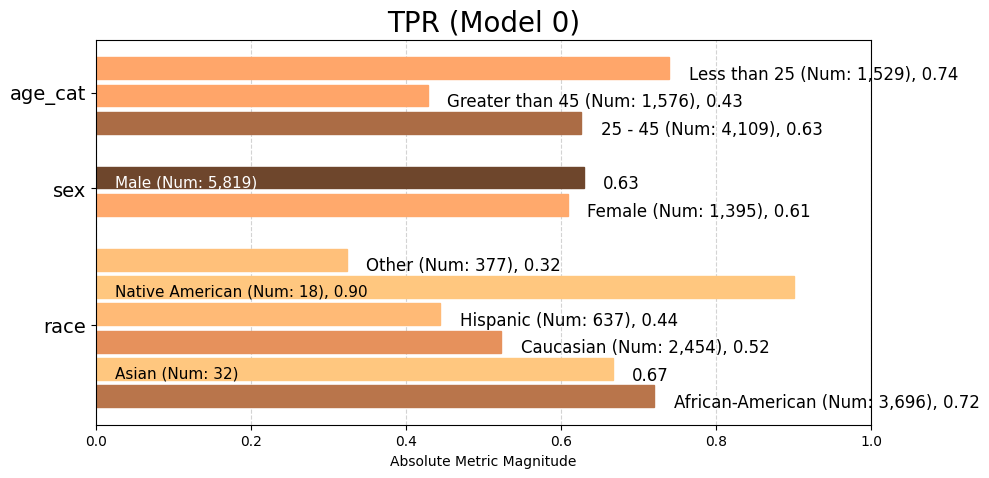

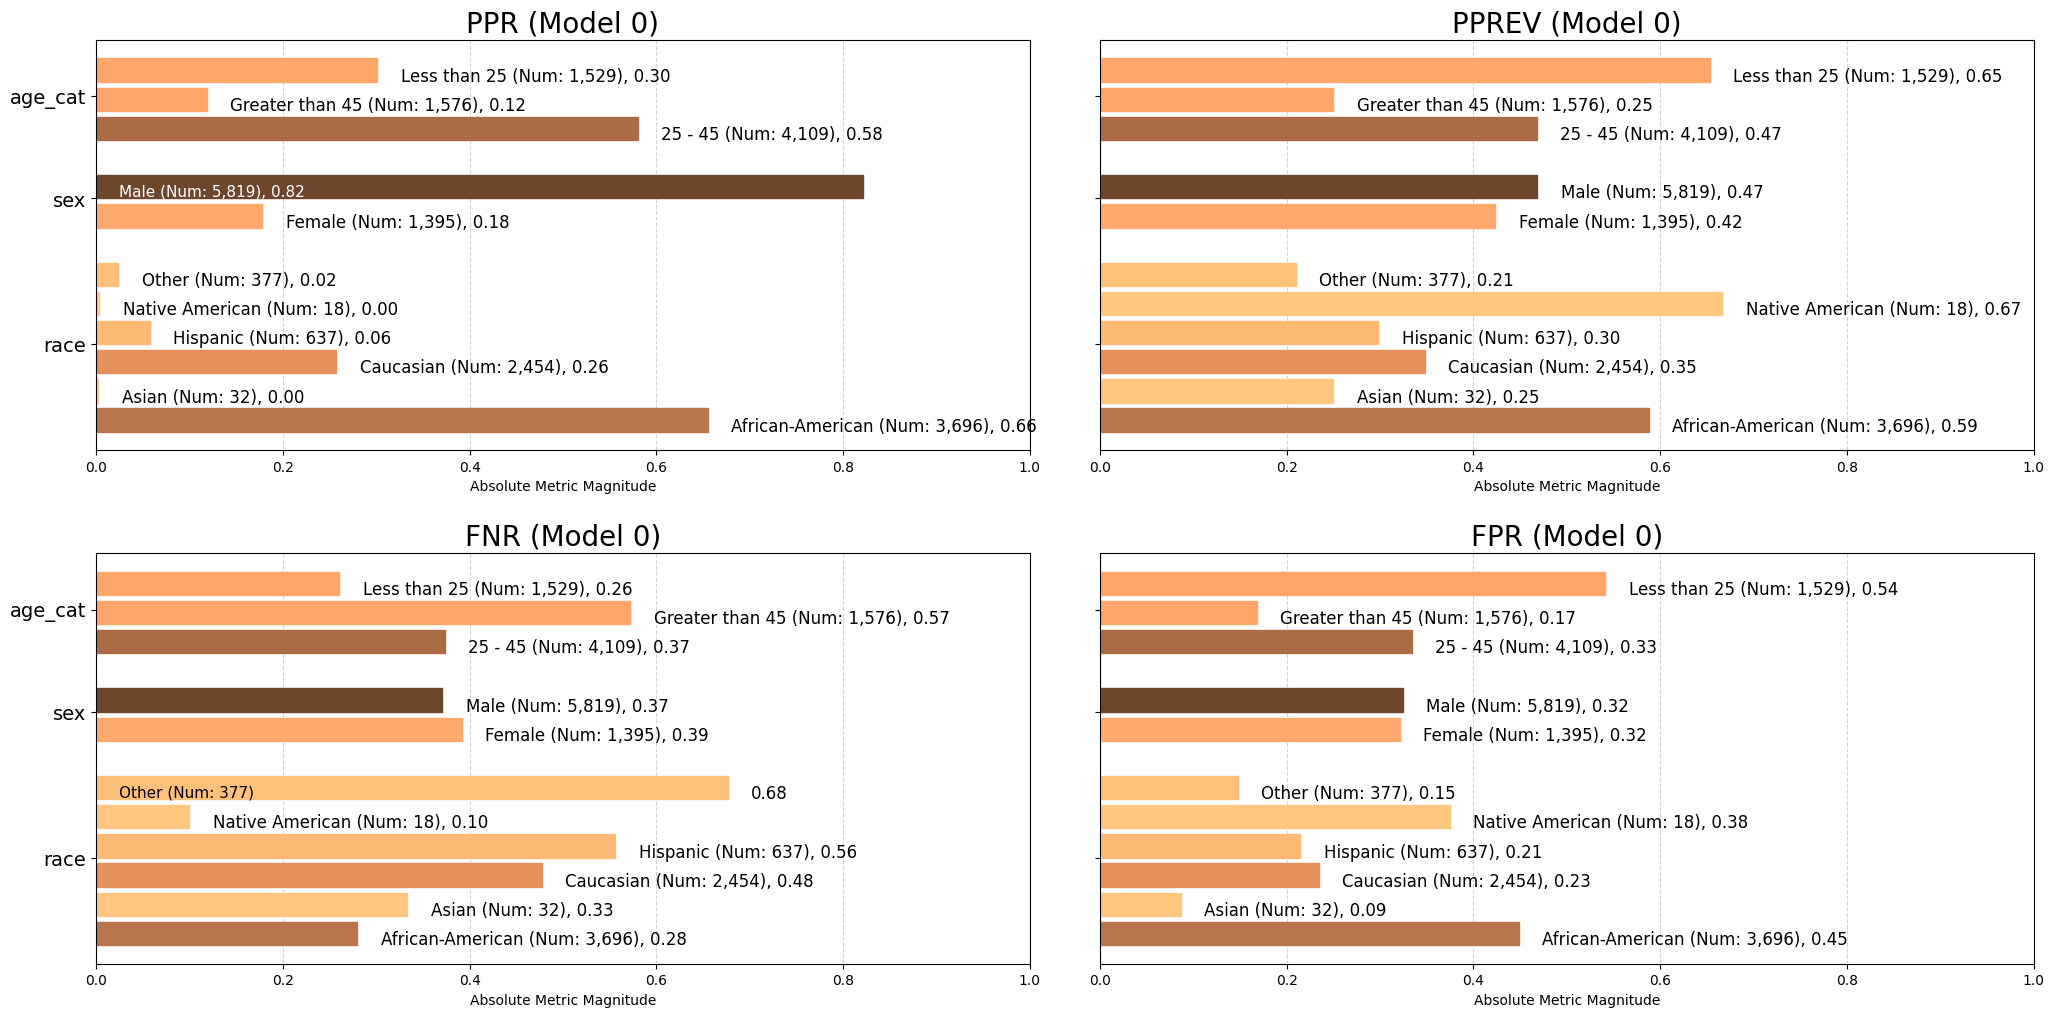

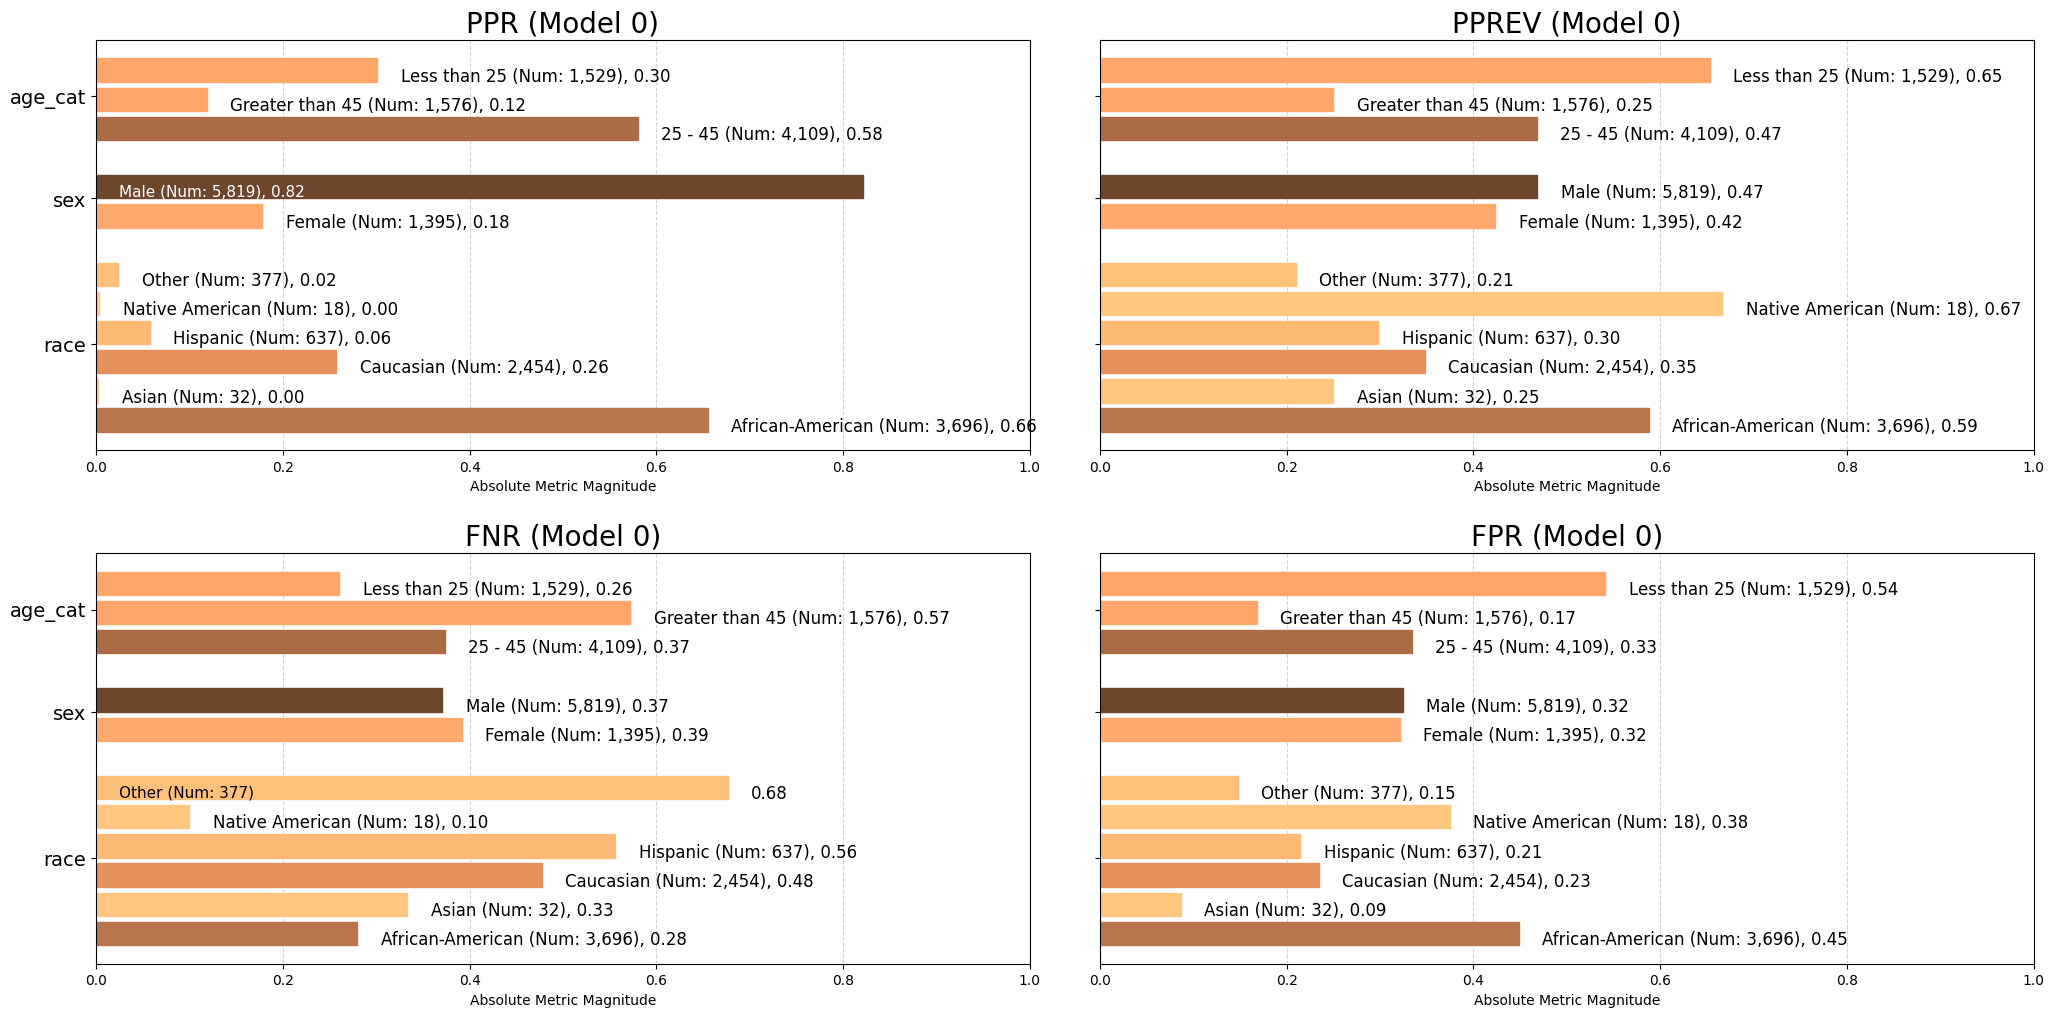

<Figure size 640x480 with 0 Axes>

In [6]:
# ===============================
# 5. VISUALIZACIÓN DE MÉTRICAS
# ===============================

aqp = Plot()

aqp.plot_group_metric(xtab, 'tpr')

aqp.plot_group_metric_all(
    xtab,
    metrics=['ppr', 'pprev', 'fnr', 'fpr'],
    ncols=2
)

In [7]:
# ===============================
# 6. CÁLCULO DE SESGO
# ===============================

b = Bias()

bdf = b.get_disparity_predefined_groups(
    xtab,
    original_df=df,
    ref_groups_dict={
        'race': 'Caucasian',
        'sex': 'Male',
        'age_cat': '25 - 45'
    }
)

bdf

get_disparity_predefined_group()


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,...,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value
0,0,binary 0/1,3317,race,African-American,0.720147,0.551532,0.349540,0.370285,0.448468,...,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
1,0,binary 0/1,3317,race,Asian,0.666667,0.913043,0.125000,0.250000,0.086957,...,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
2,0,binary 0/1,3317,race,Caucasian,0.522774,0.765457,0.288125,0.408665,0.234543,...,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
3,0,binary 0/1,3317,race,Hispanic,0.443966,0.785185,0.288591,0.457895,0.214815,...,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
4,0,binary 0/1,3317,race,Native American,0.900000,0.625000,0.166667,0.250000,0.375000,...,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
5,0,binary 0/1,3317,race,Other,0.323308,0.852459,0.302013,0.455696,0.147541,...,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
6,0,binary 0/1,3317,sex,Female,0.608434,0.678930,0.242537,0.487310,0.321070,...,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
7,0,binary 0/1,3317,sex,Male,0.629132,0.675799,0.330100,0.364637,0.324201,...,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
8,0,binary 0/1,3317,age_cat,25 - 45,0.626257,0.666216,0.323112,0.385135,0.333784,...,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45
9,0,binary 0/1,3317,age_cat,Greater than 45,0.427711,0.832096,0.241117,0.459391,0.167904,...,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45


get_disparity_major_group()


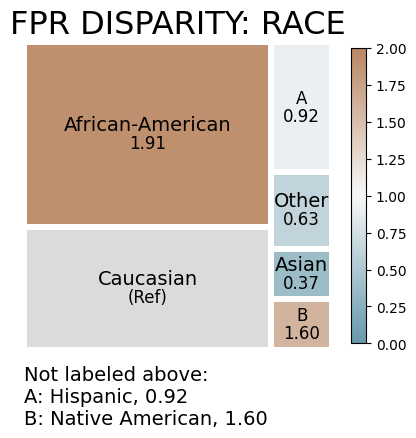

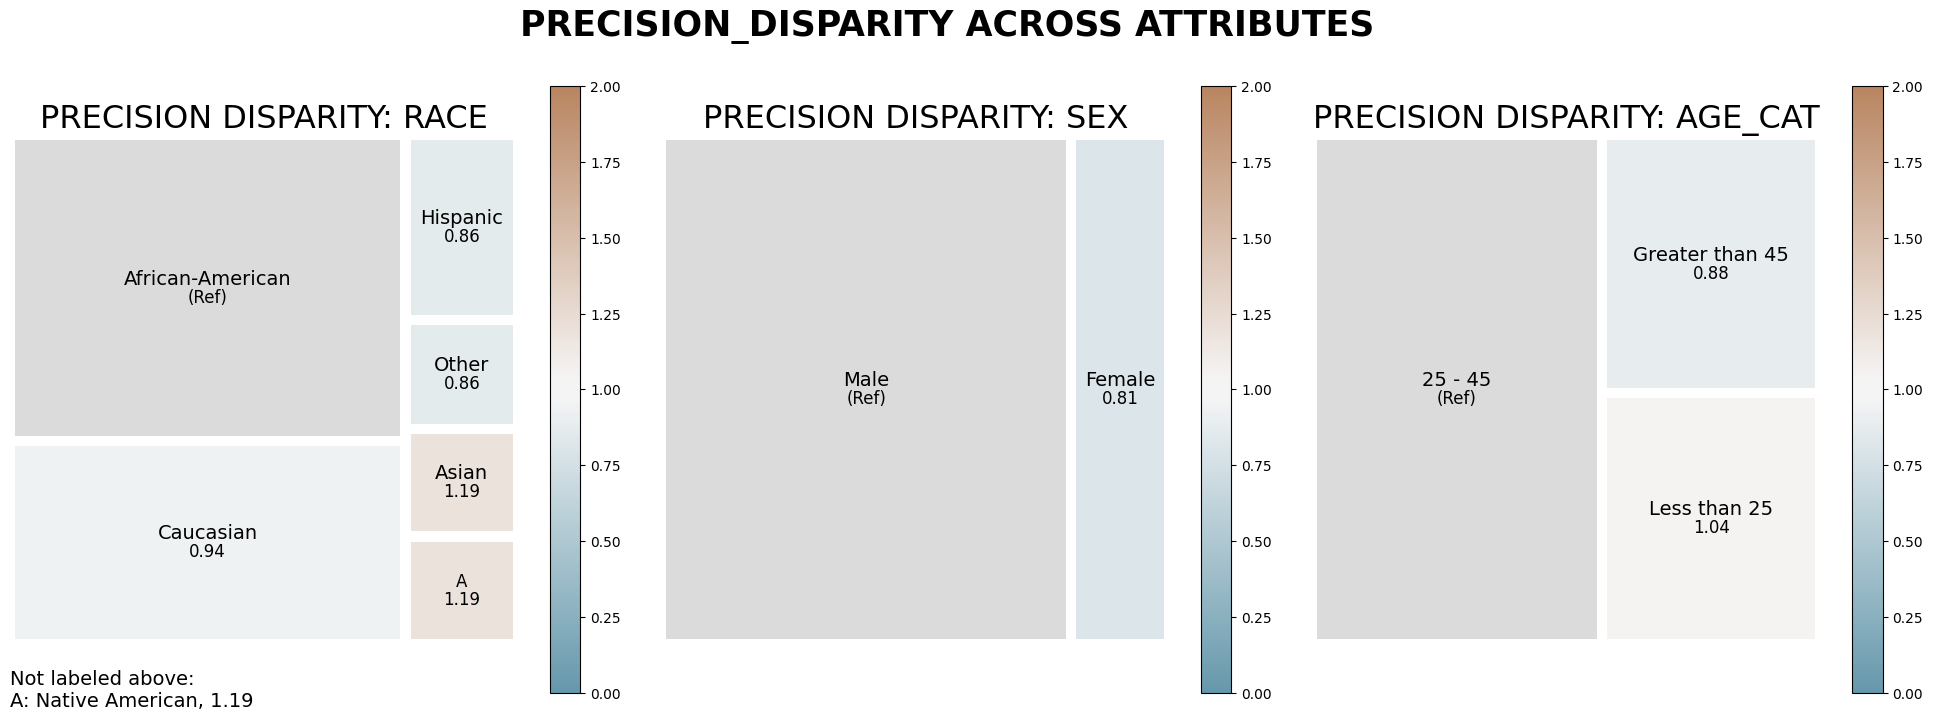

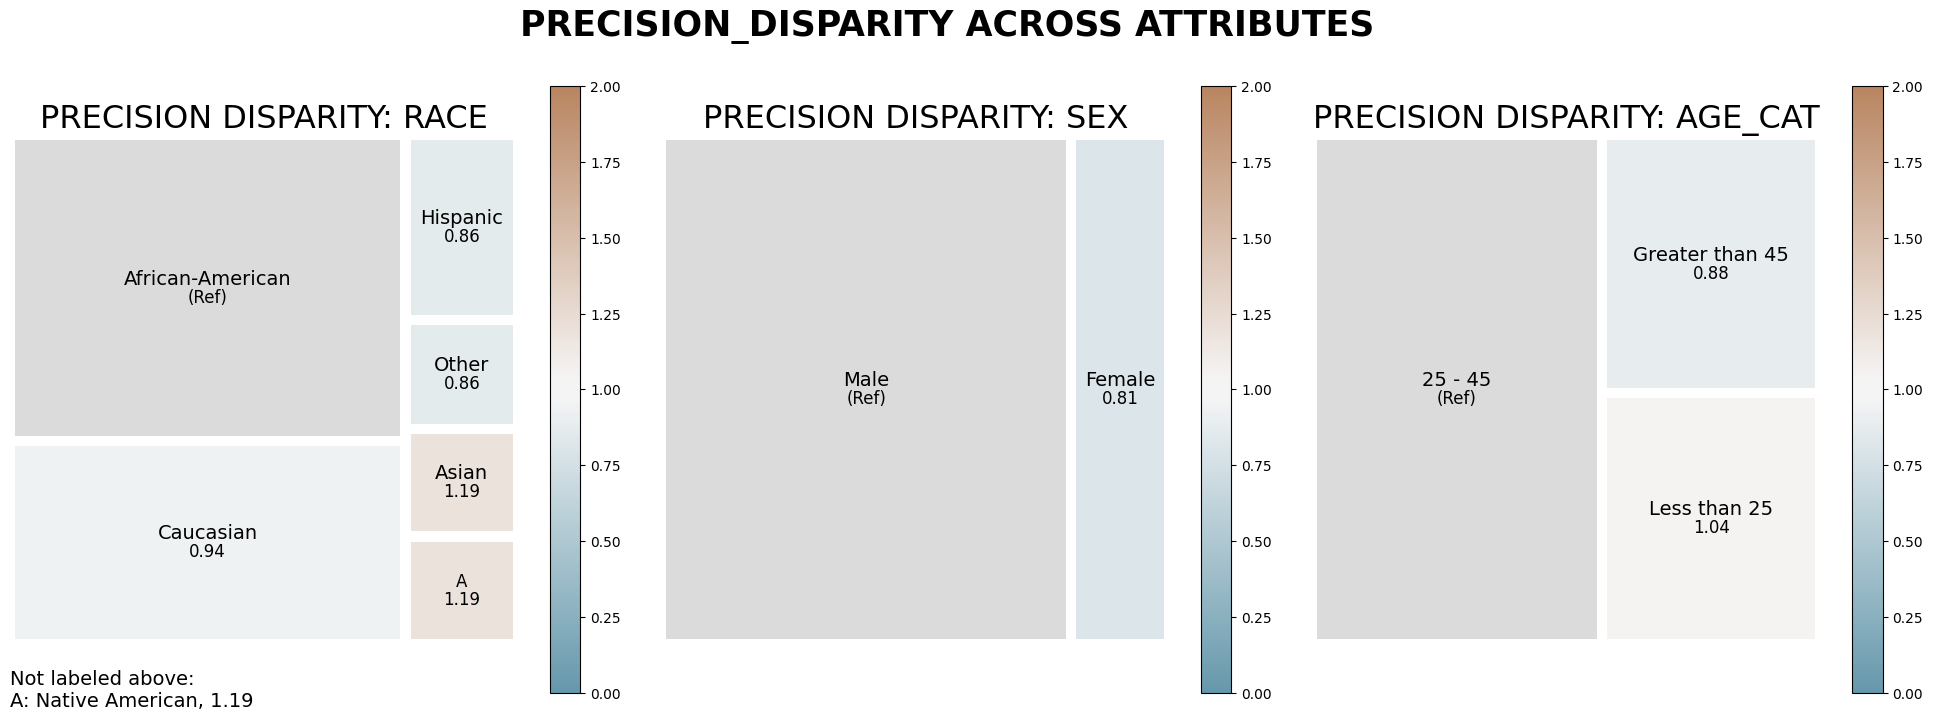

In [8]:
# ===============================
# 7. GRÁFICOS DE DISPARIDAD
# ===============================

aqp.plot_disparity(
    bdf,
    group_metric='fpr_disparity',
    attribute_name='race'
)

majority_bdf = b.get_disparity_major_group(
    xtab,
    original_df=df
)

aqp.plot_disparity_all(
    majority_bdf,
    metrics=['precision_disparity']
)

In [ ]:
# Resumen

bdf[
    ['attribute_name', 'attribute_value',
     'fpr', 'fpr_disparity',
     'precision', 'precision_disparity']
].round(3)

,attribute_name,attribute_value,fpr,fpr_disparity,precision,precision_disparity
0,race,African-American,0.448,1.912,0.630,1.065
1,race,Asian,0.087,0.371,0.750,1.268
2,race,Caucasian,0.235,1.000,0.591,1.000
3,race,Hispanic,0.215,0.916,0.542,0.917
4,race,Native American,0.375,1.599,0.750,1.268
5,race,Other,0.148,0.629,0.544,0.920
6,sex,Female,0.321,0.990,0.513,0.807
7,sex,Male,0.324,1.000,0.635,1.000
8,age_cat,25 - 45,0.334,1.000,0.615,1.000
9,age_cat,Greater than 45,0.168,0.503,0.541,0.879
